## reading in an image


Read in various Python libraries you'll need.


In [1]:

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
#GUI event loop, ensures plots appear here in the Jupyter notebook.
%matplotlib inline 

#added from image tutorial:
import os
import pandas as pd

http://matplotlib.org/users/image_tutorial.html

This image is: <class 'numpy.ndarray'> with dimesions: (720, 960, 3)


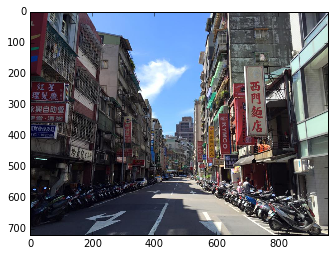

In [2]:

#reading in an image
image = mpimg.imread('Taipei_street.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

size: 30000
shape: (100, 100, 3)
type: uint8


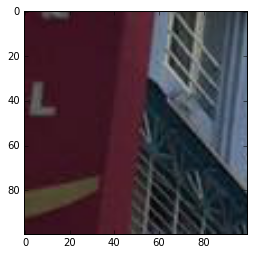

In [3]:
cropped = image[:100, :100] # y, x? limits are inclusive
plt.imshow(cropped)
print('size: ' + str(cropped.size))
print('shape: ' + str(cropped.shape))
print('type: ' + str(cropped.dtype))

Note that the image type is "numpy.ndarray".


In [4]:
image[400,400] #pixel values at x = 400, y = 400, returned values are R,G,B, type is "unsigned integer, 8 bits"

array([87, 96, 91], dtype=uint8)

In [5]:
image[400,]

array([[18, 18, 56],
       [22, 22, 60],
       [32, 32, 70],
       ..., 
       [74, 80, 76],
       [74, 80, 76],
       [74, 80, 76]], dtype=uint8)

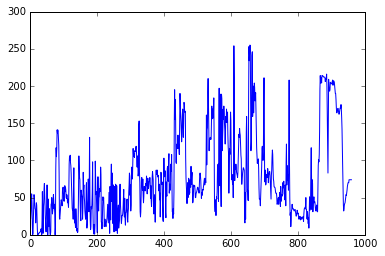

In [6]:
plt.plot(image[400,:,0]) #intensity of values on one single line crossing the image at 400th pixel

In [7]:
image[200:203, 200:203, 0]

array([[153, 163, 150],
       [147, 158, 161],
       [160, 150, 158]], dtype=uint8)

In [8]:
red_img = image[:,:,0]

This is numpy array slicing, to leave only one color channel. See image below.

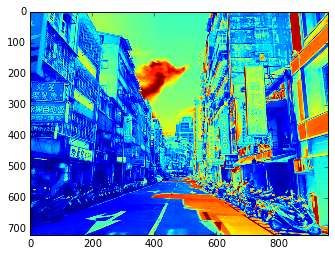

In [9]:
plt.imshow(red_img)

In [10]:
print('This image is:', type(red_img), 'with dimesions:', red_img.shape)

This image is: <class 'numpy.ndarray'> with dimesions: (720, 960)


In [11]:
red_img[400,400] # note that a single value, corresponding to the third array is displayed.

87

When this no color image is generated, the system uses a default color map (cmap). To get black and white images, set it to cmap = 'gray'.

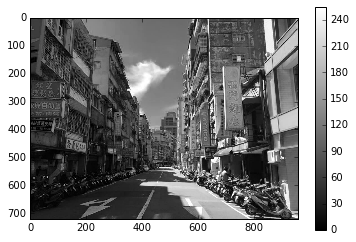

In [12]:
plt.imshow(red_img, cmap='gray')
plt.colorbar() #adds colorbar

The set_map method can also be used to set cmaps on plotted images.

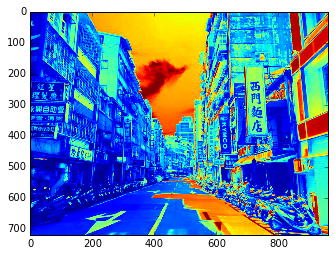

In [13]:
green_img = image[:,:,1]
plt.imshow(green_img)

In [14]:
green_and_red = green_img + red_img # pixel by pixel addition of values

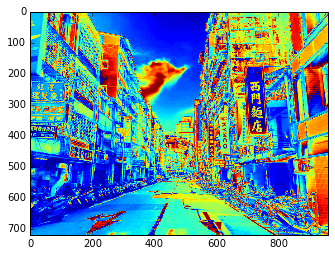

In [15]:
plt.imshow(green_and_red) 

Note how intense the colors appear on this plotted image. Keep in mind that green_and_red is just a pixel by pixel sum of values, so the values are out of the range of the initial constituent images. 

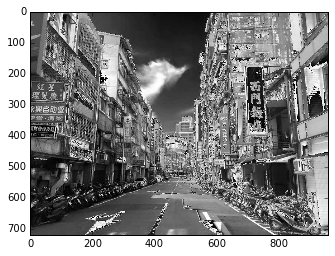

In [16]:
plt.imshow(green_and_red, cmap='gray')

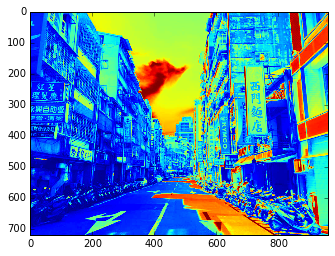

In [17]:
average = green_img/2 + red_img/2 # in effect this is an average of the two images
plt.imshow(average)

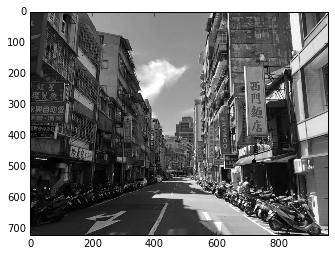

In [18]:
plt.imshow(average, cmap='gray')

Keep in mind that this image is uint8, so the maximum values will be 255 for each pixel. This means that additions that exceed this value are truncated to 255. Also, dividing each image by two and adding, or adding first and then dividing the total, can give different values because uint8 will only consist of integer values.

It is preferable to divide each image by two before adding them, as this will give more accurate averages than having sums that are out of the 8bit range can.

Multiplying the image by a scalar is possible. 

In [19]:
def scale_img(img, scalar):
    return img * scalar

In [20]:
scaled = scale_img(image, 0.5)

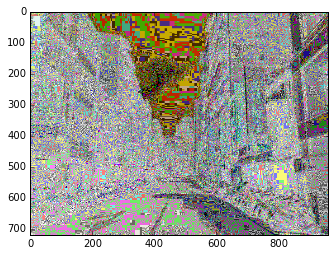

In [21]:
plt.imshow(scaled)

In [22]:
scaled[400,400]


array([ 43.5,  48. ,  45.5])

In [23]:
image[400,400]

array([87, 96, 91], dtype=uint8)

You can blend two images by multiplying them by two coefficients that add up to 1, and then adding both images. i.e., you scale down the images before summing them.

Noise is just a function, which combined with the image function results in a new function.

different types of noise:
    * salt and pepper noise - black and white specks
    * impulse noise - white specks
    * gaussian noise - randomly distributed, normally distributed

You can get the difference between two images, but the lower bound is 0, so you lose the difference unless you do the operation correctly.

You can do this with (a-b)+(b-a) which gives the absolute difference (one of those will be 0, the other won't). Converting to floating point would also work.

The image packages of MATLAB and Octave have a built in function for this (OpenCV?).

In [24]:
print(cv2.absdiff(green_img, red_img))

[[53 53 51 ..., 13 11 11]
 [53 51 51 ..., 13 11  9]
 [51 51 48 ..., 10  9  7]
 ..., 
 [ 4  4  4 ...,  4  4  4]
 [ 4  4  4 ...,  4  3  3]
 [ 4  4  4 ...,  4  4  4]]


In [25]:
print(np.random.randn(2,5)) # prints random number, calls on numpy, 2 row, 5 numbers

[[-1.00911529 -1.02938891 -0.25861726  0.31418233  0.64911269]
 [ 0.58451872  0.95421012 -1.25511009 -1.37127034 -0.32202885]]


randn draws random numbers from a normal (gaussian) distribution (hence the 'n'). Mean is 0, SD is 1. Getting numbers close to 0 are more likely than numbers further away from 0.

In [26]:
noise = np.random.randn(720,960)*25 # as sigma is increased, the distribution of the gaussian noise is increased
image_with_noise = red_img + noise

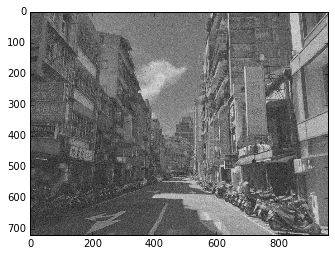

In [27]:
plt.imshow(image_with_noise, cmap='gray')

Be aware of the magnitude of the noise with respect to the magnitude of the image!!!

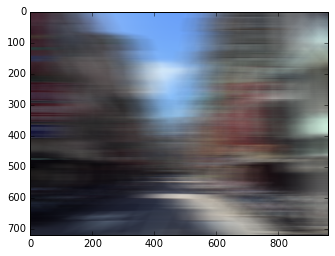

In [28]:
cv_blur = cv2.GaussianBlur(image, (355, 5),0 ) # openCV gaussian blur function, arg in paren is height, width of kernel
#kernel should be odd and positive
plt.imshow(cv_blur)

If noise is distributed normally and with mean = 0, then how are negative values handled if image pixel values start at 0?

To denoise or smooth an image, make each pixel an average of the pixels around it. This gets rid of sharp edges.

Smoothing works when some assumptions are correct. 

The first assumption is that the real value of a pixel is similar to the value of the nearby pixels.

The second is that the noise of each pixel is independent of the noise of all other pixels. You assume the average of the noise is zero.




It can be argued that closer pixels should contribute more to the average, so they can also be weighted to reflect this assumption.

Non-uniform weights give a smoother rendition. This is referred to as 'cross correlation'.
The 'kernel' or 'mask' used in cross correlation.

You should use odd-sized weights so the middle pixel is at the center of the weight mask.

When applying filters you want to scale the weights so they sum to 1!



Gaussian filter - "circularly symmetric (isometric) fuzzy blob"

When defining a gaussian filter you define the size of the matrix and the sigma value. NB: kernel size refers to the sigma size!

The kernel has to be big enough, but the sigma is what really matters.

In a gaussian filter the sigma is in space, whereas in noise it's in the intensity.

# Impulse function

An impulse function is an idealised function that is very narrow and very tall so that it has a unit area. At the limit it has zero width and infinite height. 

**convolution** - filters flip impulse signals. It's the physics of what happens when you put a signal through the filter.

**shift invariance** - operator behaves the same everywhere. The value of the output depends on the pattern in the image neighborhood not the position of the image neighborhood.

Properties of convolution:

1. commutative (f*h = h*f)
2. associative (f(g*h) = (f*g)h)
3. identity
4. differentiation



## Boundary Issues

Several different methods:

1. clip filter (black)
2. wrap around (assumes you're looking at a periodic signal)
3. copy edge (aka, replicate method)
4. reflect across edge


Sharper - accentuates differences with local average



median filter - median filter is better than an average filter. Less responsive to extremes.
Median filters are edge-preserving, whereas average filters destroy the edges.

really effective in removing salt and pepper noise.




## Filters as template

Correlation mapping makes the brightest spot on the image be the place where the template matches the features on the image.

# coding a region of interest mask

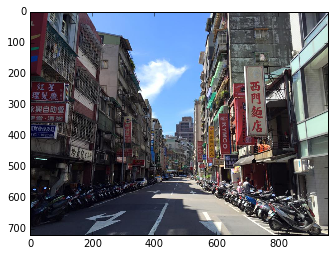

In [55]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)
plt.imshow(region_select)

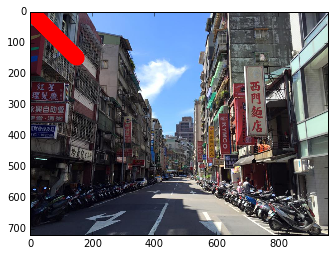

In [65]:
#points = np.array([[910, 641], [206, 632], [696, 488], [458, 485]])
#cv2.polylines(region_select, np.int32([points]), 50, (255,0,0))
cv2.line(region_select,(0,0),(150,150),(255,0,0),50)
plt.imshow(region_select)
plt.savefig('region_select.jpg')

In [59]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [48]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [720, 0]
right_bottom = [720, 960]
apex = [400, 480]


/Users/christianmondorf/anaconda/envs/SDCND/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


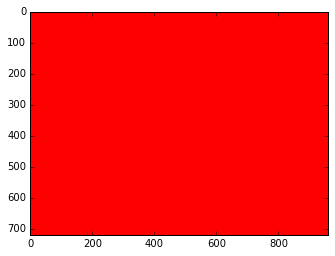

In [54]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
plt.imshow(region_select)

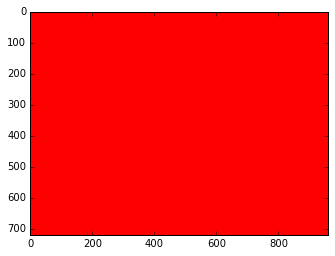

In [50]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[~region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)